# Express path to classifying images 

In this notebook, we will show how to run classification software similar to how Google images works.

Julia allows us to load in various pre-trained models for classifying images, via the `Metalhead.jl` package.

In [10]:
using Metalhead  # To run type <shift> + enter
using Metalhead: classify

In [ ]:
using Images

Let's download an image of an elephant:

In [11]:
download("http://www.mikebirkhead.com/images/EyeForAnElephant.jpg", "elephant.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 70249  100 70249    0     0   483k      0 --:--:-- --:--:-- --:--:--  486k


"elephant.jpg"

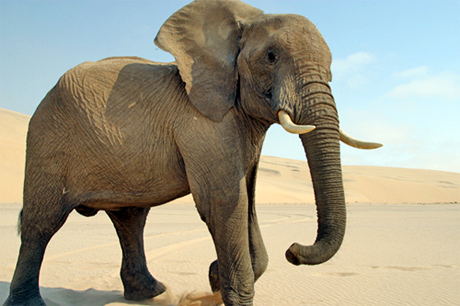

In [19]:
image = load("elephant.jpg") # open up a new cell type ESC + b (for below)

We'll use the VGG19 model, which is a deep convolutional neural network trained on a subset of the ImageNet database. As this is your first notebook, very likely the words "convolutional", and "neural net," and "deep," may seem mysterious.  At the end of this course these words will no longer be mysterious.

In [20]:
vgg = VGG19()

VGG19()

Neural networks contain letters.  Here we will display the layers.

In [21]:
for i=1:28
  println(vgg.layers[i])
end

Conv((3, 3), 3=>64, NNlib.relu)
Conv((3, 3), 64=>64, NNlib.relu)
Metalhead.#7
Conv((3, 3), 64=>128, NNlib.relu)
Conv((3, 3), 128=>128, NNlib.relu)
Metalhead.#8
Conv((3, 3), 128=>256, NNlib.relu)
Conv((3, 3), 256=>256, NNlib.relu)
Conv((3, 3), 256=>256, NNlib.relu)
Conv((3, 3), 256=>256, NNlib.relu)
Metalhead.#9
Conv((3, 3), 256=>512, NNlib.relu)
Conv((3, 3), 512=>512, NNlib.relu)
Conv((3, 3), 512=>512, NNlib.relu)
Conv((3, 3), 512=>512, NNlib.relu)
Metalhead.#10
Conv((3, 3), 512=>512, NNlib.relu)
Conv((3, 3), 512=>512, NNlib.relu)
Conv((3, 3), 512=>512, NNlib.relu)
Conv((3, 3), 512=>512, NNlib.relu)
Metalhead.#11
Metalhead.#12
Dense(25088, 4096, NNlib.relu)
Flux.Dropout{Float32}(0.5f0, false)
Dense(4096, 4096, NNlib.relu)
Flux.Dropout{Float32}(0.5f0, false)
Dense(4096, 1000)
NNlib.softmax


To classify the image using the model, we just run the following command, and it returns its best guess at a classification:

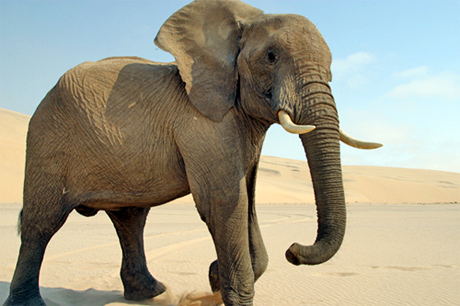

In [22]:
image

In [23]:
classify(vgg, image)

"Indian elephant, Elephas maximus"

Exercise: grab a favorite image, then classify it. Tell us what you got!

In [24]:
# hint: mimic cells 2,3, and 8
# then send us all a text

We can do the same with any image we have around, for example Alan's dog, Philip:

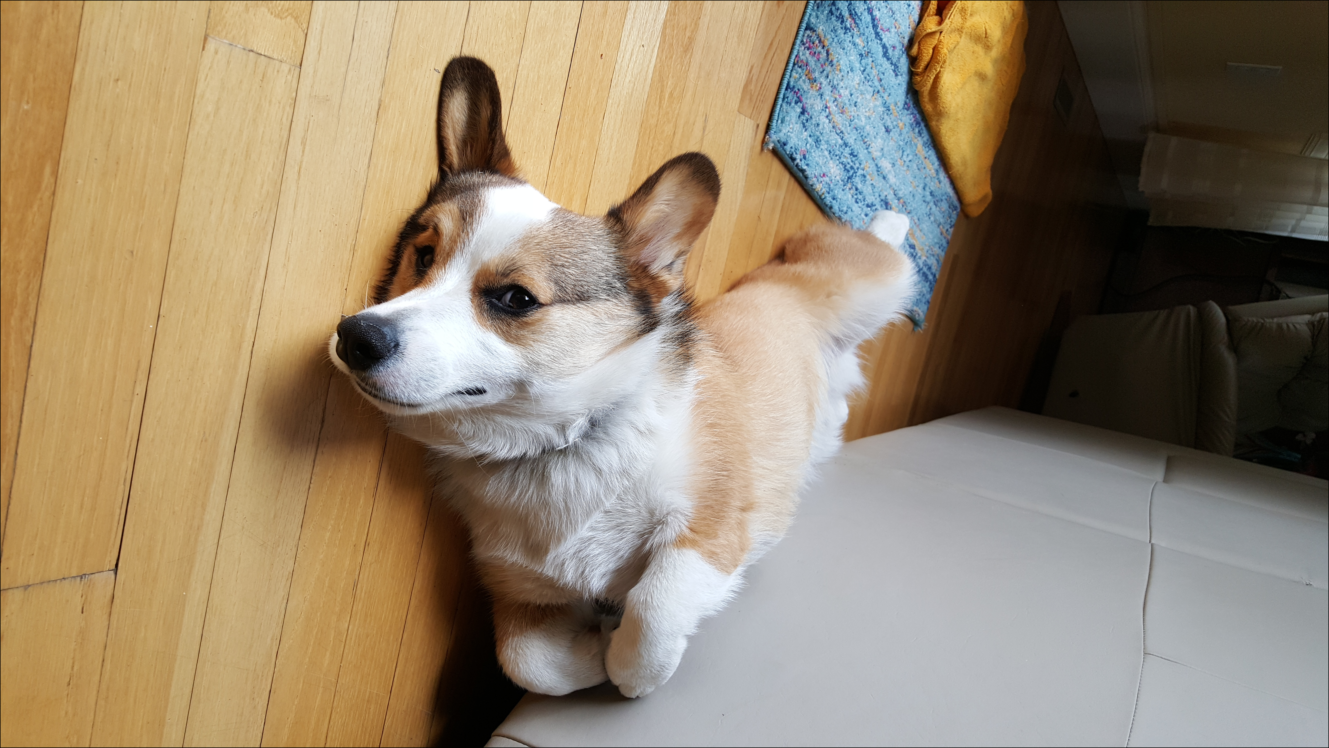

In [25]:
image = load("data/philip.jpg")

In [26]:
classify(vgg, image)

"coyote, prairie wolf, brush wolf, Canis latrans"

## What is going on here?

VGG19 classifies images according to the following 1000 different classes:

In [43]:
Metalhead.imagenet_classes[rand(1:1000,1,1)]

1×1 Array{SubString{String},2}:
 "spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish"

The model is a Convolutional Neural Network (CNN), made up of a sequence of layers of "neurons" with interconnections. The huge number of parameters making up these interconnections have previously been learnt to correctly predict a set of training images representing each class.

Running the model on an image spits out the probability that the model assigns to each class:

In [46]:
probs = Metalhead.forward(vgg, image)


1000-element Array{Float32,1}:
 1.63018f-6 
 2.15715f-6 
 5.18166f-5 
 3.35693f-5 
 1.19394f-5 
 1.99997f-6 
 3.12634f-6 
 1.16456f-5 
 2.5052f-5  
 1.8185f-5  
 5.59743f-5 
 3.0728f-5  
 4.13232f-6 
 ⋮          
 1.0402f-6  
 4.68551f-6 
 2.75854f-6 
 0.000256149
 4.1313f-6  
 5.65274f-8 
 7.35599f-5 
 5.60976f-6 
 8.6417f-6  
 1.84298f-5 
 0.000288156
 0.000120735

We can now see which are the most likely few labels:

In [47]:
perm = sortperm(probs)
probs[273]

0.2683542f0

In [51]:
[ Metalhead.imagenet_classes(vgg)[perm] probs[perm] ][end:-1:end-10, :]

LoadError: [91mMethodError: objects of type Array{SubString{String},1} are not callable
Use square brackets [] for indexing an Array.[39m

## What are the questions to get a successful classifier via machine learning?

The key questions to obtain a successful classifier in machine learning are:

- How do we define a suitable model that can model the data adequately?

- How do we train it on suitably labelled data?

These are the questions that this course is designed to address.